<div style="border:solid Chocolate 2px; padding: 40px">

Привет, меня зовут Александр Куимов. Я буду ревьюером твоего проекта. Ты можешь обращаться ко мне на "ты"😏 Надеюсь, тебя также не смутит, если я буду обращаться к тебе на "ты", но если это неудобно, обязательно скажи об этом!

Пожалуйста, не удаляй мои комментарии, они будут особенно полезны для нашей работы в случае повторной проверки проекта. 

Ты также можешь реагировать на мои комментарии своими по шаблону, показанному чуть ниже. Это нужно, чтобы не создавалась путаница😉

Ты можешь найти мои комментарии, обозначенные <font color='green'>зеленым</font>, <font color='gold'>желтым</font> и <font color='red'>красным</font> цветами, например:

<br/>

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> В случае, если решение на отдельном шаге является полностью правильным.
</div>

<br/>

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> В случае, когда решение на отдельном шаге станет еще лучше, если внести небольшие коррективы.
</div>


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
 В случае, когда решение на отдельном шаге требует существенной переработки и внесения правок. Напоминаю, что проект не может быть принят с первого раза, если ревью содержит комментарии, рекомендующие доработать шаги.
</div>
    
    
<br/>    
<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> В такой цветовой ячейке я прошу тебя оставлять свои комментарии. Если исправляешь проект на второй итерации и выше, не забывай пожалуйста указывать номер итерации, например, "Комментарий студента v.2".
</div> 

<br/>    
    
Увидев у тебя неточность, в первый раз я лишь укажу на ее наличие и дам тебе возможность самому найти и исправить ее. На реальной работе твой руководитель будет поступать также, и я пытаюсь подготовить тебя именно к работе датасаентистом. Но если ты пока не справишься с такой задачей - при следующей проверке я дам более точную подсказку!🤓

# Проект (Телеком)

- Проект (Телеком)
- Описание Проекта
- Выгрузка Данных
- Исследовательский Анализ + Предобработка Данных
- Обучение Моделей
- Тестировка Модели
- Вывод

# Описание Проекта

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Задача — обучить на этих данных модель для прогноза оттока клиентов.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Вижу твое добавленное описание проекта. Молодец! Это поможет тебе расставлять акценты в выводах.

# Выгрузка Данных

In [1]:
import os
import sys
import random

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import seaborn as sns
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import roc_auc_score, roc_curve, auc, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from catboost import CatBoostClassifier

from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
RANDOM_STATE = 220623

In [3]:
random.seed(RANDOM_STATE)

### Описание Данных
database - telecom.
- contract - информация о договорах;
- personal - персональные данные клиентов;
- internet - информация об интернет-услугах;
- phone - информация об услугах телефонии.

(Информация о договорах актуальна на 1 февраля 2020.)

In [4]:
db_config = {
'user': 'praktikum_student',# имя пользователя,
'password': 'Sdf4$2;d-d30pp',# пароль,
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432,# порт подключения,
'database': 'data-science-final'# название базы данных,
}

In [5]:
def connect(params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL database...')
        conn = psycopg2.connect(**params_dic)
    except (Exception, psycopg2.DatabaseError) as error:
        print(error)
        sys.exit(1) 
    print("Connection successful")
    return conn

In [6]:
def postgresql_to_dataframe(conn, select_query, column_names):
    cursor = conn.cursor()
    try:
        cursor.execute(select_query)
    except (Exception, psycopg2.DatabaseError) as error:
        print("Error: %s" % error)
        conn.rollback()
        cursor.close()
        return 1
    
    # Naturally we get a list of tupples
    tupples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tupples, columns=column_names)
    return df

In [7]:
conn = connect(db_config)

Connecting to the PostgreSQL database...
Connection successful


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть подключение к базам данных)

### Проверим Данные

In [8]:
query_contract_info = \
"SELECT table_name, column_name, data_type FROM information_schema.columns WHERE table_name = 'contract';"
columns_contract_info = ['table_name', 'column_name', 'data_type']
contract_info = postgresql_to_dataframe(conn, query_contract_info, columns_contract_info)

In [9]:
contract_info

,table_name,column_name,data_type
0,contract,customerID,text
1,contract,BeginDate,date
2,contract,EndDate,date
3,contract,Type,text
4,contract,PaperlessBilling,text
5,contract,PaymentMethod,text
6,contract,MonthlyCharges,numeric
7,contract,TotalCharges,numeric


In [10]:
query_personal_info = \
"SELECT table_name, column_name, data_type FROM information_schema.columns WHERE table_name = 'personal';"
columns_personal_info = ['table_name', 'column_name', 'data_type']
personal_info = postgresql_to_dataframe(conn, query_personal_info, columns_personal_info)

In [11]:
personal_info

,table_name,column_name,data_type
0,personal,customerID,text
1,personal,gender,text
2,personal,SeniorCitizen,integer
3,personal,Partner,text
4,personal,Dependents,text


In [12]:
query_internet_info =\
"SELECT table_name, column_name, data_type FROM information_schema.columns WHERE table_name = 'internet';"
columns_internet_info = ['table_name', 'column_name', 'data_type']
internet_info = postgresql_to_dataframe(conn, query_internet_info, columns_internet_info)

In [13]:
internet_info

,table_name,column_name,data_type
0,internet,c1,text
1,internet,c2,text
2,internet,c3,text
3,internet,c4,text
4,internet,c5,text
5,internet,c6,text
6,internet,c7,text
7,internet,c8,text


В описании проекта данные о таблице 'internet' выглядят вот так:
- customerID — ID пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

Стоит выбрать несколько строк данных чтобы проверить если данные хранятся в таком же порядке.

In [14]:
query_internet_sample =\
"SELECT * FROM telecom.internet LIMIT 5;"
columns_internet_sample = ['customerID', 'ItnernetService', 'OnlineSecurity', 'OnlineBackup',
                           'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet_sample = postgresql_to_dataframe(conn, query_internet_sample, columns_internet_sample)

In [15]:
internet_sample

,customerID,ItnernetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1,7590-VHVEG,DSL,No,Yes,No,No,No,No
2,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
4,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No


In [16]:
query_phone_info =\
"SELECT table_name, column_name, data_type FROM information_schema.columns WHERE table_name = 'phone';"
columns_phone_info = ['table_name', 'column_name', 'data_type']
phone_info = postgresql_to_dataframe(conn, query_phone_info, columns_phone_info)

In [17]:
phone_info

,table_name,column_name,data_type
0,phone,c1,text
1,phone,c2,text


В описании проекта данные о таблице 'phone' выглядят вот так:
- customerID — ID пользователя;
- MultipleLines — подключение телефона к нескольким линиям

Стоит выбрать несколько строк данных чтобы проверить если данные хранятся в таком же порядке.

In [18]:
query_phone_sample = \
"SELECT * FROM telecom.phone LIMIT 5;"
columns_phone_sample = ['customerID', 'MultipleLines']
phone_sample = postgresql_to_dataframe(conn, query_phone_sample, columns_phone_sample)

In [19]:
phone_sample

,customerID,MultipleLines
0,customerID,MultipleLines
1,5575-GNVDE,No
2,3668-QPYBK,No
3,9237-HQITU,No
4,9305-CDSKC,Yes


# Исследовательскй Анализ + Предобрабока Данных

- Наша модель будет предсказывать если данные ползьватель относится к гуппе которые скорее всего перестанут пользоваться услугами компании.
- Нам нужно будет выделить тех ползователей которые перeстали пользоваться услугами и скорее всего мы будем использовать 'telecom.contract' таблицу и 'EndDate' колонку.
- У нас будут абоненты с уникальным идентификатором 'customerID' и целевой переменной.
- Только остается объединить все остальные полезные признаки (Feature Engineering).

Feature Engineering:
- Большинство признаков по 'customerID' можно будет проверить на корреляцию с не большой выборкой для скорости.
- Когда мы будем проверять корреляцию нужно будет обращать внимание на качественные и количественные переменные.
- Можно будет еще построить признаки по дате:
  - Сколько обонент уже ползуется услугами.
  - Можно еще провести анализ по окончании действия договоров в зависимости от времени года.
  - Этот пункт как совет для компании как улучшить сервис.

Проверка корреляции:
- Мы построим таблицу состоящую из 'customerID' и 'terminated' (целевой признак)
- Потом будем рандомно выбирать данные из колонок и сопостовлять по 'customerID'

In [20]:
query_customer =\
'SELECT "customerID", "EndDate" FROM telecom.contract;'
columns_customer = ['customerID', 'EndDate']
customer = postgresql_to_dataframe(conn, query_customer, columns_customer)

"posgreSQL работает с учетом регистра, нужно использовать кавычки правильно"

In [21]:
customer.sample(4)

,customerID,EndDate
190,2684-EIWEO,2019-11-01
1305,1449-XQEMT,2019-12-01
6462,5331-RGMTT,None
5458,1337-BOZWO,None


In [22]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7043 non-null   object
 1   EndDate     1869 non-null   object
dtypes: object(2)
memory usage: 110.2+ KB


In [23]:
customer['terminated'] = customer.EndDate.notna()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Целевой признак выбран корректно

### Проверка Качественных Параметров
- Type
- PaperlessBilling
- PaymentMethod
- gender
- SeniorCitizen
- Partner
- Dependents
- ItnernetService - OHE?
- OnlineSecurity
- OnlineBackup
- DeviceProtection
- TechSupport
- StreamingTV
- StreamingMovies
- MultipleLines

In [24]:
query_categorical =\
'''
WITH good_ids AS (
    SELECT "customerID"
    FROM telecom.contract
    ORDER BY RANDOM()
    LIMIT 1000
), contract_categorical AS (
    SELECT "customerID", "Type", "PaperlessBilling", "PaymentMethod"
    FROM telecom.contract
    WHERE "customerID" IN (
        SELECT *
        FROM good_ids
    )
), personal_categorical AS (
    SELECT *
    FROM telecom.personal
    WHERE "customerID" IN (
        SELECT *
        FROM good_ids
    )
), internet_categorical AS (
    SELECT *
    FROM telecom.internet
    WHERE "c1" IN (
        SELECT *
        FROM good_ids
    )
), phone_categorical AS (
    SELECT *
    FROM telecom.phone
    WHERE "c1" IN (
        SELECT *
        FROM good_ids
    )
)

SELECT 
    key.*, 
    cc."Type", cc."PaperlessBilling", cc."PaymentMethod",
    pc."gender", pc."SeniorCitizen", pc."Partner", "Dependents",
    ic."c2", ic."c3", ic."c4", ic."c5", ic."c6", ic."c7", ic."c8",
    phone_categorical."c2"
FROM good_ids AS key
    INNER JOIN contract_categorical AS cc
    ON key."customerID" = cc."customerID"
    INNER JOIN personal_categorical AS pc
    ON key."customerID" = pc."customerID"
    INNER JOIN internet_categorical AS ic
    ON key."customerID" = ic."c1"
    INNER JOIN phone_categorical
    ON key."customerID" = phone_categorical."c1"
    ;
'''
columns_categorical = [
    'customerID', 
    'Type', 'PaperlessBilling', 'PaymentMethod',
    'gender', 'SeniorCitizen', 'Partner', 'Dependents',
    'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'MultipleLines'
]
categorical = postgresql_to_dataframe(conn, query_categorical, columns_categorical)

In [25]:
categorical.head()

,customerID,Type,PaperlessBilling,PaymentMethod,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
0,0004-TLHLJ,Month-to-month,Yes,Electronic check,Male,0,No,No,Fiber optic,No,No,Yes,No,No,No,No
1,0013-SMEOE,Two year,Yes,Bank transfer (automatic),Female,1,Yes,No,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,No
2,0014-BMAQU,Two year,Yes,Credit card (automatic),Male,0,Yes,No,Fiber optic,Yes,No,No,Yes,No,No,Yes
3,0022-TCJCI,One year,No,Credit card (automatic),Male,1,No,No,DSL,Yes,No,Yes,No,No,Yes,No
4,0074-HDKDG,One year,Yes,Bank transfer (automatic),Male,0,Yes,Yes,DSL,Yes,Yes,Yes,No,No,No,No


In [26]:
for column in categorical.columns:
    print("{:20} {}".format(column, len(pd.unique(categorical[column]))))

customerID           659
Type                 3
PaperlessBilling     2
PaymentMethod        4
gender               2
SeniorCitizen        2
Partner              2
Dependents           2
InternetService      2
OnlineSecurity       2
OnlineBackup         2
DeviceProtection     2
TechSupport          2
StreamingTV          2
StreamingMovies      2
MultipleLines        2


Благодоря INNER JOIN у нас нет пропусков, но видно что теперь выборка содержит меньше значений, этого должно хватить для корреляции 

- 'Type' нужно провести OneHotEncoding
- 'PaymentMethod' нужно провести OneHotEncoding

In [27]:
pd.unique(categorical.Type)

array(['Month-to-month', 'Two year', 'One year'], dtype=object)

In [28]:
categorical['Type_month_to_month'] = categorical.Type == 'Month-to-month'
categorical['Type_one_year'] = categorical.Type == 'One year'
categorical['Type_two_year'] = categorical.Type == 'Two year'
categorical = categorical.drop(columns=['Type'])

In [29]:
pd.unique(categorical.PaymentMethod)

array(['Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)', 'Mailed check'], dtype=object)

In [30]:
categorical['PaymentMethod_electronic_check'] = categorical['PaymentMethod'] == 'Electronic check'
categorical['PaymentMethod_bank_transfer_(automatic)'] = categorical['PaymentMethod'] == 'Bank transfer (automatic)'
categorical['PaymentMethod_credict_card_(automatic)'] = categorical['PaymentMethod'] == 'Credit card (automatic)'
categorical['PaymentMethod_mailed_check'] = categorical['PaymentMethod'] == 'Mailed check'
categorical = categorical.drop(columns=['PaymentMethod'])

In [31]:
categorical['gender_male'] = categorical['gender'] == 'Male'
categorical = categorical.drop(columns=['gender'])

In [32]:
categorical['SeniorCitizen'] = categorical['SeniorCitizen'] == 1

In [33]:
categorical['InternetService_fiber_optic_not_DSL'] = categorical['InternetService'] == 'Fiber optic'
categorical = categorical.drop(columns=['InternetService'])

In [34]:
yes_no_cols = ['PaperlessBilling', 'Partner', 'Dependents', 'OnlineSecurity', 'OnlineBackup',
               'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines']
for col in yes_no_cols:
    categorical[col] = categorical[col] == 'Yes'

In [35]:
categorical.head(3)

,customerID,PaperlessBilling,SeniorCitizen,Partner,Dependents,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,...,MultipleLines,Type_month_to_month,Type_one_year,Type_two_year,PaymentMethod_electronic_check,PaymentMethod_bank_transfer_(automatic),PaymentMethod_credict_card_(automatic),PaymentMethod_mailed_check,gender_male,InternetService_fiber_optic_not_DSL
0,0004-TLHLJ,True,False,False,False,False,False,True,False,False,...,False,True,False,False,True,False,False,False,True,True
1,0013-SMEOE,True,True,True,False,True,True,True,True,True,...,False,False,False,True,False,True,False,False,False,True
2,0014-BMAQU,True,False,True,False,True,False,False,True,False,...,True,False,False,True,False,False,True,False,True,True


<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Здесь мы видим все категоральные признаки, или все опции по услугам компании.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [36]:
categorical = pd.merge(categorical, customer, on='customerID', how='inner')

In [37]:
categorical = categorical.drop(columns=['EndDate'])

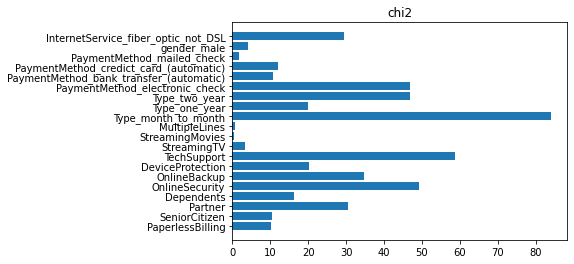

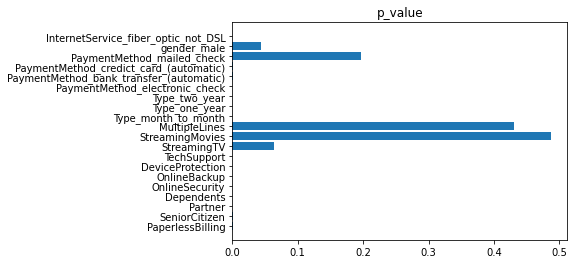

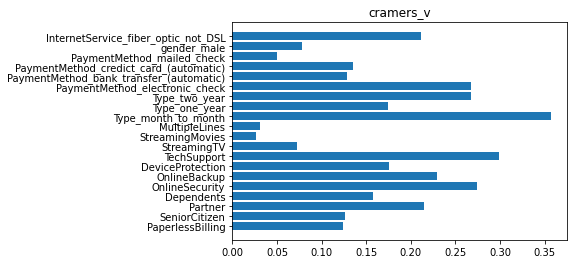

In [38]:
names = []
chi2_list = []
p_value_list = []
cramers_v_list = []

significant_cols = []

for col in categorical.columns:
    if col == 'customerID' or col == 'terminated':
        continue
    
    # Create a contingency table
    contingency_table = pd.crosstab(categorical[col], categorical['terminated'])

    # Perform the chi-square test
    chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

    # Calculate Cramer's V
    n = contingency_table.sum().sum()
    phi_corr = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
    cramers_v = phi_corr
    
    if cramers_v > 0.04:
        significant_cols.append(col)
    
    names.append(col)
    chi2_list.append(chi2)
    p_value_list.append(p_value)
    cramers_v_list.append(cramers_v)
    
#     print('{:40} Chi-square-{:5.1f} P-value-{:.2f} Cramer\'s V-{:.2f}'\
#           .format(str(col), chi2, p_value, cramers_v))
x_axis = range(1, len(names) + 1)
plt.barh(names, chi2_list)
plt.title('chi2')
plt.show()
plt.barh(names, p_value_list)
plt.title('p_value')
plt.show()
plt.barh(names, cramers_v_list)
plt.title('cramers_v')
plt.show()

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> На этих графиках видна сильныая корреляция у колонок 'Type_month_to_month' (payment type), 'PaymentMethod_electronic_check' (payment method) и "TechSupport" - техническая поддержка.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [39]:
def cramers_v(x, y):
    contingency_table = pd.crosstab(x, y)
    chi2, _, _, _ = stats.chi2_contingency(contingency_table)

    n = contingency_table.sum().sum()
    cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

    return cramers_v

In [40]:
# Calculate the correlation matrixa
categorical[['terminated', 'PaperlessBilling']].corr(method=cramers_v)

,terminated,PaperlessBilling
terminated,1.000000,0.123712
PaperlessBilling,0.123712,1.000000


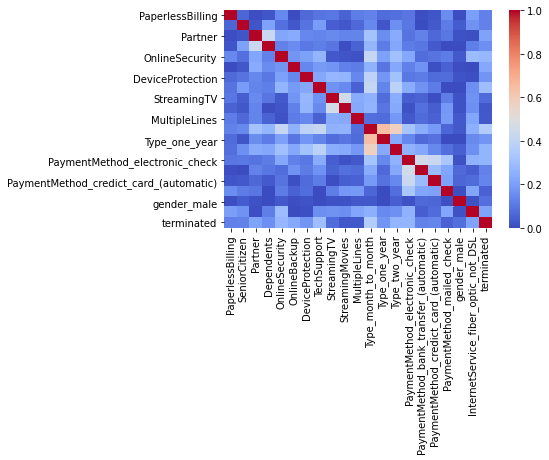

In [41]:
# Calculate the correlation matrixa
correlation_matrix = categorical.drop(columns=['customerID']).corr(method=cramers_v)

# Plot the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, cmap='coolwarm')

# Show the plot
plt.show()

In [42]:
significant_cols

['PaperlessBilling',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Type_month_to_month',
 'Type_one_year',
 'Type_two_year',
 'PaymentMethod_electronic_check',
 'PaymentMethod_bank_transfer_(automatic)',
 'PaymentMethod_credict_card_(automatic)',
 'PaymentMethod_mailed_check',
 'gender_male',
 'InternetService_fiber_optic_not_DSL']

In [43]:
print('target value count ratio {:.2f}'.format(categorical.terminated.sum() /\
                                               categorical.shape[0]))

target value count ratio 0.33


Это количество данных где мы потеряли клиентов, чтобы корреляция не потерялась

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> Напоминаю о проверке дисбаланса классов
    
Знай, что метрика ROC-AUC устойчива к дисбалансу классов, поэтому нам можно не проводить балансировку классов

### Проверим Корреляцию на Колличественных Данных

- MontlyCharges
- TotalCharges

In [44]:
query_numerical =\
'''
WITH good_ids AS (
    SELECT "customerID"
    FROM telecom.contract
    ORDER BY RANDOM()
    LIMIT 1000
)

SELECT "customerID", "MonthlyCharges", "TotalCharges"
FROM telecom.contract
WHERE "customerID" IN (
    SELECT *
    FROM good_ids
);
'''
columns_numerical = ['customerID', 'MonthlyCharges', 'TotalCharges']
numerical = postgresql_to_dataframe(conn, query_numerical, columns_numerical)

In [45]:
numerical.head(3)

,customerID,MonthlyCharges,TotalCharges
0,3668-QPYBK,53.85,108.15
1,5709-LVOEQ,80.85,None
2,9305-CDSKC,99.65,820.5


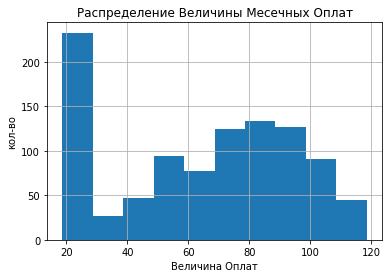

In [46]:
numerical.MonthlyCharges.hist()
plt.title('Распределение Величины Месечных Оплат')
plt.xlabel('Величина Оплат')
plt.ylabel('кол-во')
plt.show()

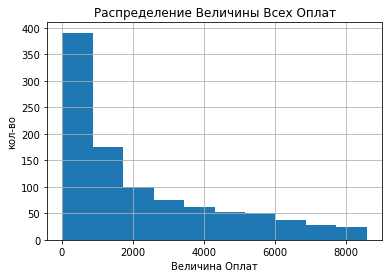

In [47]:
numerical.TotalCharges.hist()
plt.title('Распределение Величины Всех Оплат')
plt.xlabel('Величина Оплат')
plt.ylabel('кол-во')
plt.show()

In [48]:
numerical = pd.merge(numerical, customer, on='customerID', how='inner')

In [49]:
numerical.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customerID      1000 non-null   object
 1   MonthlyCharges  1000 non-null   object
 2   TotalCharges    998 non-null    object
 3   EndDate         261 non-null    object
 4   terminated      1000 non-null   bool  
dtypes: bool(1), object(4)
memory usage: 40.0+ KB


In [50]:
numerical.MonthlyCharges = numerical.MonthlyCharges.astype('float')

In [51]:
numerical.TotalCharges = numerical.TotalCharges.astype('float')

In [52]:
numerical.MonthlyCharges.corr(numerical.terminated)

0.21655474248587545

In [53]:
numerical.TotalCharges.corr(numerical.terminated)

-0.21698842891852285

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Здесь мы проверили корреляцию у двух числовых показателей - месячная стоимость, и сумма затрат за весь период контракта.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

Наблюдается корреляция которая пригодится

Построим новые данные:
- сколько клиент на продолжении времени пользуется услугами

In [54]:
query_contract_length =\
'''
WITH good_ids AS (
    SELECT "customerID"
    FROM telecom.contract
    ORDER BY RANDOM()
    LIMIT 1000
)

SELECT "customerID", COALESCE("EndDate", '2020-02-1') - "BeginDate" AS "ContractLifeDays"
FROM telecom.contract
WHERE "customerID" IN (
    SELECT *
    FROM good_ids
);
'''
columns_contract_length = ['customerID', 'ContractLifeDays']
contract_length = postgresql_to_dataframe(conn, query_contract_length, columns_contract_length)

In [55]:
contract_length.head(5)

,customerID,ContractLifeDays
0,4472-LVYGI,0
1,2775-SEFEE,0
2,8665-UTDHZ,126
3,9420-LOJKX,353
4,1658-BYGOY,402


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 

Молодец, что создаешь новый полезный признак) 
    
Время жизни клиента часто используется в телекоме. Отлично, что последней датой используется не сегодняшняя дата, а дата выгрузки. Даты убраны, верно, так нет утечки

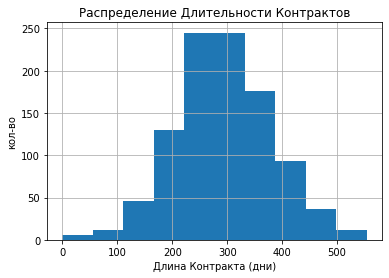

In [56]:
contract_length.ContractLifeDays.hist()
plt.title('Распределение Длительности Контрактов')
plt.xlabel('Длина Контракта (дни)')
plt.ylabel('кол-во')
plt.show()

In [57]:
contract_length = pd.merge(contract_length, customer, on='customerID', how='inner')

In [58]:
contract_length = contract_length.drop(columns='EndDate')

In [59]:
contract_length.head()

,customerID,ContractLifeDays,terminated
0,4472-LVYGI,0,False
1,2775-SEFEE,0,False
2,8665-UTDHZ,126,True
3,9420-LOJKX,353,True
4,1658-BYGOY,402,True


In [60]:
print('target value count ratio {:.2f}'.format(contract_length.terminated.sum() /\
                                               contract_length.shape[0]))

target value count ratio 0.28


In [61]:
contract_length.ContractLifeDays.corr(contract_length.terminated)

0.061166874860098246

Видно что корреляция очень слабая, даже не стоит использовать эти данные.

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Нужно еще вывести матрицу корреляций у полученного датасета. Заранее предупрежу тебя, что учитывая специфику наших данных: численные с ненормальным распределением + категориальные, правильно будет использовать phik - корреляцию, а корреляция Пирсона не подойдет.
    
Для категориальных признаков некорректно применять корреляцию Пирсона или Спирмена, правильно будет использовать phik - корреляцию или Крамера.    
 </div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Мне не понятно зачем нам матрица корреляций. Нам важно обращать внимание на корреляцию между целевым признаком а не общую корреляцию. Все равно добавил выше.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

### Выгрузка Данных

In [62]:
significant_cols

['PaperlessBilling',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Type_month_to_month',
 'Type_one_year',
 'Type_two_year',
 'PaymentMethod_electronic_check',
 'PaymentMethod_bank_transfer_(automatic)',
 'PaymentMethod_credict_card_(automatic)',
 'PaymentMethod_mailed_check',
 'gender_male',
 'InternetService_fiber_optic_not_DSL']

In [63]:
internet_sample.head(2)

,customerID,ItnernetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
1,7590-VHVEG,DSL,No,Yes,No,No,No,No


In [64]:
query_df = \
'''
SELECT 
    CASE
        WHEN c."EndDate" IS NOT NULL THEN TRUE
        ELSE FALSE
    END AS terminated,
    COALESCE(c."EndDate", '2020-02-1') - c."BeginDate" AS "ContractLifeDays",
    c."Type", c."PaymentMethod", c."MonthlyCharges", c."TotalCharges", c."PaperlessBilling",
    p."SeniorCitizen", p."Partner", p."Dependents",
    i."c2", i."c3", i."c4", i."c5", i."c6", i."c7", i."c8",
    phone."c2"
FROM telecom.contract AS c
    LEFT JOIN telecom.personal AS p
    ON c."customerID" = p."customerID"
    LEFT JOIN telecom.internet AS i
    ON c."customerID" = i."c1"
    LEFT JOIN telecom.phone
    ON c."customerID" = phone."c1"
'''
columns_df = ['terminated', 'days', 'type', 'payment_method', 'monthly_charges',
              'total_charges', 'paperless_billing', 'senior_citizen', 'partner', 'dependents',
              'internet_service', 'online_security', 'online_backup', 'device_protection', 
              'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines']
df = postgresql_to_dataframe(conn, query_df, columns_df)

In [65]:
df.head(2)

,terminated,days,type,payment_method,monthly_charges,total_charges,paperless_billing,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
0,False,0,Two year,Bank transfer (automatic),52.55,None,Yes,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,No,None
1,False,0,Two year,Mailed check,20.25,None,No,0,No,Yes,None,None,None,None,None,None,None,No


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   terminated         7043 non-null   bool  
 1   days               7043 non-null   int64 
 2   type               7043 non-null   object
 3   payment_method     7043 non-null   object
 4   monthly_charges    7043 non-null   object
 5   total_charges      7032 non-null   object
 6   paperless_billing  7043 non-null   object
 7   senior_citizen     7043 non-null   int64 
 8   partner            7043 non-null   object
 9   dependents         7043 non-null   object
 10  internet_service   5517 non-null   object
 11  online_security    5517 non-null   object
 12  online_backup      5517 non-null   object
 13  device_protection  5517 non-null   object
 14  tech_support       5517 non-null   object
 15  streaming_tv       5517 non-null   object
 16  streaming_movies   5517 non-null   object


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Присоединение таблиц корректное! Никакие группы клиентов не удалились

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера  <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
После объединения таблиц, для итогового датафрейма нужно вывести графики распределения признаков

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Пострил таблицы после того как привел данные к правильному типу.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [67]:
df.monthly_charges = df.monthly_charges.astype('float')
df.total_charges = df.total_charges.astype('float')

In [68]:
df.days = df.total_charges.fillna(0)
df.monthly_charges = df.monthly_charges.fillna(0)
df.total_charges = df.total_charges.fillna(0)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 5 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
df.days не следует переназначать признаком df.total_charges

In [69]:
df.terminated = df.terminated.astype('int')

In [70]:
for col in df.columns:
    if df[col].dtype == 'object':
        print(df[col].value_counts())

Month-to-month    3875
Two year          1695
One year          1473
Name: type, dtype: int64
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: payment_method, dtype: int64
Yes    4171
No     2872
Name: paperless_billing, dtype: int64
No     3641
Yes    3402
Name: partner, dtype: int64
No     4933
Yes    2110
Name: dependents, dtype: int64
Fiber optic    3096
DSL            2421
Name: internet_service, dtype: int64
No     3498
Yes    2019
Name: online_security, dtype: int64
No     3088
Yes    2429
Name: online_backup, dtype: int64
No     3095
Yes    2422
Name: device_protection, dtype: int64
No     3473
Yes    2044
Name: tech_support, dtype: int64
No     2810
Yes    2707
Name: streaming_tv, dtype: int64
No     2785
Yes    2732
Name: streaming_movies, dtype: int64
No     3390
Yes    2971
Name: multiple_lines, dtype: int64


Не знаю как это можно прокоментировать

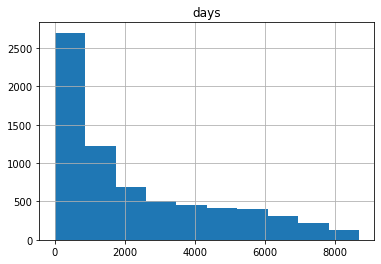

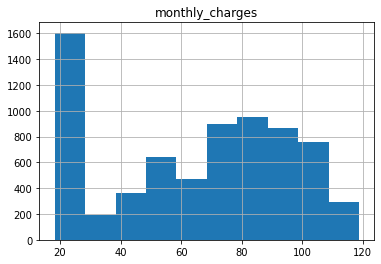

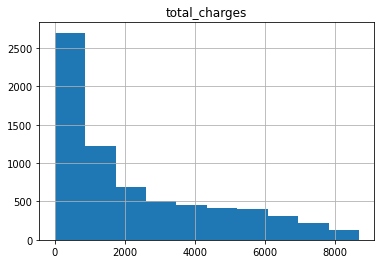

In [71]:
for col in df.columns:
    if df[col].dtype == 'float64' or df[col].dtype == 'float64':
        df[col].hist()
        plt.title(col)
        plt.show()

Данные распределенные нормально

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

Для `TotalCharges` оптимальным решением будет заполнить пропуски нулем, значением из ‘MonthlyCharges’ или же просто удалить их.

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Заполнил на 0
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [72]:
df.senior_citizen = df.senior_citizen.fillna(0)

In [73]:
for col in df.columns:
    if df[col].dtype == 'object':
        print('{:20} {}'.format(col, pd.unique(df[col])))

type                 ['Two year' 'Month-to-month' 'One year']
payment_method       ['Bank transfer (automatic)' 'Mailed check' 'Electronic check'
 'Credit card (automatic)']
paperless_billing    ['Yes' 'No']
partner              ['Yes' 'No']
dependents           ['Yes' 'No']
internet_service     ['DSL' None 'Fiber optic']
online_security      ['Yes' None 'No']
online_backup        ['No' None 'Yes']
device_protection    ['Yes' None 'No']
tech_support         ['Yes' None 'No']
streaming_tv         ['Yes' None 'No']
streaming_movies     ['No' None 'Yes']
multiple_lines       [None 'No' 'Yes']


где можно заполним пропуски на 'No' в последнем случаем заполним 'DSL' так как это более частый провайдер

In [74]:
df.internet_service = df.internet_service.fillna('DSL')

In [75]:
df = df.fillna('No')

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

    
Нужно еще написать вывод по результатам проведенного исследовательского анализа данных

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил пару комметариев. Не уверен на что нужно обращать внимание.
</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2 <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Вывода не увидел. В целом нужно описать, с какими данными нам предстоит работать, найденные особенности в данных

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [76]:
enc = OneHotEncoder(drop='first')

In [77]:
df_train, df_test = train_test_split(df, test_size=0.25, random_state=RANDOM_STATE)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
При построении и поиске лучшей модели следует использовать только кросс-валидацию. validation выборку создавать  не следует . test_size указать 0.25
 </div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Хорошо.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [78]:
X_train_cat = enc.fit_transform(
    df_train.drop(columns=['terminated', 'days', 
                                 'monthly_charges', 'total_charges'])).toarray()

In [79]:
sca = StandardScaler()

In [80]:
X_train_num = sca.fit_transform(df_train[['days', 'monthly_charges', 'total_charges']])

In [81]:
X_train = np.hstack((X_train_cat, X_train_num))

In [82]:
X_test_cat = enc.transform(df_test.drop(columns=['terminated', 'days', 
                          'monthly_charges', 'total_charges'])).toarray()

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    

- В агрументе  OneHotEncoder следует указать drop=’first’, чтобы избыточные столбцы удалялись.
- Кодировать следует только категориальные признаки, без численных.    
 </div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Конечно
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [83]:
X_train_num = sca.fit_transform(df_train[['days', 'monthly_charges', 'total_charges']])
X_test_num = sca.transform(df_test[['days', 'monthly_charges', 'total_charges']])

In [84]:
X_train = np.hstack((X_train_cat, X_train_num))
X_test = np.hstack((X_test_cat, X_test_num))

In [85]:
y_train = df_train.terminated
y_test = df_test.terminated

# Обучение Моделей

Попробуем и оценим модели метрикой ROC-AUC:
- RandomForest
- XGBoost
- Feed-forward neural network with Keras

In [86]:
param_grid = {'n_estimators': [200], 'min_samples_leaf': [14]}
rfc = RandomForestClassifier()
grid_rfc = GridSearchCV(rfc, param_grid, scoring='roc_auc')
grid_rfc.fit(X_train, y_train)
grid_rfc.best_score_

0.8491641161787632

In [87]:
grid_rfc.best_params_

{'min_samples_leaf': 14, 'n_estimators': 200}

In [88]:
model_best = grid_rfc.best_estimator_

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>

Использована не нужная нам метрика в подборе гиперпараметров. Следует использовать `scoring='roc_auc'`
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Хорошо
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Сравнение моделей следует провести на кросс-валидации `grid.best_score_` 


<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [89]:
model_cat = CatBoostClassifier(
    n_estimators=24, max_depth=2, loss_function='Logloss', eval_metric='AUC')
model_cat.fit(X_train, y_train, verbose=False)

In [90]:
model_xgb = xgb.XGBClassifier(
    use_label_encoder=False, eval_metric='auc', n_estimators=2, max_depth=4)
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              eval_metric='auc', gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=4, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=2, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Для модели нужно провести подбор гиперпараметров


<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [91]:
# callback = EarlyStopping(monitor='accuracy', patience=40)
optimizer = Adam(learning_rate=0.005)

model_ff = Sequential()
model_ff.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_ff.add(Dense(64, activation='tanh'))
# model_ff.add(Dropout(0.4))
model_ff.add(Dense(1, activation='sigmoid'))

model_ff.compile(loss='binary_crossentropy', 
                 optimizer=optimizer, metrics=tf.keras.metrics.AUC())

2023-06-25 16:38:07.607670: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [92]:
# model_ff.fit(X_train, y_train, epochs=4, callbacks=[callback], verbose=2)
model_ff.fit(X_train, y_train, epochs=2, batch_size=1, verbose=1)

Epoch 1/2
5282/5282 [==============================] - 18s 3ms/step - loss: 0.4491 - auc: 0.8116
Epoch 2/2
5282/5282 [==============================] - 17s 3ms/step - loss: 0.4402 - auc: 0.8209


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
        
Рассмотрены все основные типы моделей)

# Тестировка Модели

- Проеверим качество лучшей модели по ROC-AUC
- Построим матрицу ошибок
- Проанализируем вашность оснобных признаков
- Проведем дополнительное исследование самого важного признака

In [93]:
z_test = model_cat.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, z_test)
print('CatBoost score:', roc_auc)

CatBoost score: 0.8343508108740245


In [94]:
# accuracy = accuracy_score(y_test, (np.round(z_test.reshape(1, -1)) == 1)[0])
# print('Feed-forward neural network accuracy score:', accuracy)

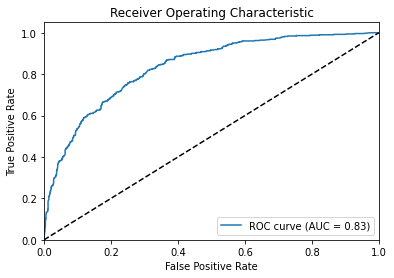

In [95]:
fpr, tpr, thresholds = roc_curve(y_test, z_test)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Вместо predict следует использовать predict_proba, раз мы вычисляем AUC-ROC на тесте. Исправь, пожалуйста.
</div>

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Получаю такую ошибку. <br/>
    AttributeError: 'Sequential' object has no attribute 'predict_proba' <br/>
</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>  Точно, нейронные сети не работают напрямую с predict_proba. В этой сылке описаны различные подходы к вычислению roc-auc: https://stackoverflow.com/questions/68971378/attributeerror-sequential-object-has-no-attribute-predict-proba

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Эти подходы не работают, Sigmoid должен и так выдаваеть вероятность одного варианта или другого?
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 3 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
Уточнение. Действительно, в Keras метод predict уже выдает вероятности принадлежности к классу 1, если использовать sigmoid в качестве функции активации на последнем слое. Поэтому можно использовать метод predict и затем вычислить AUC-ROC на тестовой выборке    

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b> 
    
Значение roc_auc на тестовой выборке должно быть не менее 0.85 

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Я попросил совета как улучшить мою модель. Я исползую все что знаю - EarlyStopping, Dropout.
</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 3 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

Для улучшения модели можно использовать следующие подходы:
    
- Попробовать использовать другую архитектуру нейронной сети, например, добавить больше скрытых слоев или изменить количество нейронов в каждом слое.
- Использовать более продвинутые методы регуляризации, такие как L1 или L2 регуляризация.

Предлагаю также поработать плотнее с классическими моделями. Общие рекомендации: расширить границы перебираемых диапазонов гиперпараметров (иногда примерные значения полезно поискать на профильных форумах и сайтах), попробовать для бустингов встроенную кодировку, поглубже изучить сами признаки, проверить используется ли признак время жизни клиента в днях в обучении    

<div class="alert alert-info">
<h2> Комментарий студента 3: <a class="tocSkip"> </h2>

<b>👋:</b> Я перебрал очень много моделей нейронок, и пробовал работать с классическими моделями. XGBoost показал наилучший результат, но выше 0.837 ROC AUC score у меня не получается.
</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 4 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Можешь пожалуйста описать, какие конкретно шаги ты предпринял для улучшения метрики?
    
- Попробуй для целевой переменной использовать численные значения: 0 - действующий клиент, 1 - ушедший клиент, а не True/False    
    
- Желательно выбирать количество деревьев у леса побольше и больший шаг при переборе.
        
 Советую сделать разбег в 10 деревьев, начинать с 10 штук, максимум 100 - 200. Для бустинга - аналогично.
    
 Я бы еще добавил еще максимальное число признаков в обучении `max_features` и минимальное число объектов в листе `min_sample_leaf` (заставляем алгоритм смотреть более “широкими мазками”) для леса. Параметр max_depth я бы убрал, пусть будет по умолчанию. В нейронке, возможно, следовало еще попробовать применить различные значения `learning_rate`, например 0.00005 и 0.01
       
 </div>    

<div class="alert alert-info">
<h2> Комментарий студента 4: <a class="tocSkip"> </h2>

<b>👋:</b> Поменял тип данных 'terminated' на 'int'. И попробовал перебрать больше параметров у леса. Не получается поднять резултат больше 0.83. Я так же пробовал другие функции активации у нейронных моделей, и tanh показал лучше результат, но выше 0.83 не поднимался. Я так же пробовал провести исследование если есть какая то закономерность у ложных предсказаний, но не получилось найти эту закономерность.
</div> 

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 5 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
Что еще могу посоветовать: 
    
- можно попробовать добавить новые признаки, которые могут быть полезны для модели (polynomial features: https://www.aiproblog.com/index.php/2020/05/28/how-to-use-polynomial-feature-transforms-for-machine-learning/). 
    
- Проверь, совпадает ли распределение признаков в обучающей и тестовой выборках. Также можно провести более глубокий анализ данных и обнаружить закономерности, которые помогут лучше понять поведение клиентов и улучшить модель. 
    
    
- можно удалить неполезные признаки, которые не влияют на результат. Для этого провести отбор признаков перед подбором гиперпараметров у моделей. Про функции feature selection можешь прочитать документацию sklearn: <a href="https://scikit-learn.org/stable/modules/feature_selection.html">feature selection</a>.  К примеру, можно  использовать такой метод: https://scikit-learn.org/stable/modules/generated/sklearn.inspection.permutation_importance.html
    
Советую тебе обратиться за помощью к преподавателю по проектам, что поможет объяснить под другим углом возможно ошибку.  

<div class="alert alert-info">
<h2> Комментарий студента 5: <a class="tocSkip"> </h2>

<b>👋:</b> Может есть какие-нибудь советы по выгрузке данных, потомучто когда не такие плохие показатели
</div> 


<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 6 <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
    
- Могу посоветовать в выгрузках, генерации признаков (напр. время жизни клиента), предобработке данных использовать стандартные методы pandas, вместо SQL-методов
- Похоже ты не заметил комментария выше (версия 5): df.days не следует переназначать признаком df.total_charges
- Попробуй создать признак прибыль от абонента в день, в кросс-валидации можно применить метод Stratify Kfold: https://academy.yandex.ru/handbook/ml/article/kross-validaciya
    

<div class="alert alert-info">
<h2> Комментарий студента 6: <a class="tocSkip"> </h2>

<b>👋:</b> Привет, я приношу извинения за такой долгий процесс. Я провел очень глубокий анализ разных показателей и кореляций - ниже, я пробовал убирать плохие показатели и добавлять новые колличественные показатели, модели не вытягивяют результат выше 0.83.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 7 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>
    
По решению старшего тимлида принимаю твой проект    

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
        
Нужно дополнительно рассчитать и Accuracy
    

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Добавил
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
        
Нужно  вывести матрицу ошибок для лучшей модели. Это довольно полезный инструмент для анализа модели

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [96]:
confusion_matrix = pd.crosstab(pd.Series(y_test, name='Actual'),
                               pd.Series((np.round(z_test.reshape(1, -1)) == 1)[0], name='Predicted'))

confusion_matrix

Predicted,False,True
Actual,,
0,5,0
1,357,104


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>
        
Нужно еще вывести полноту и точность на график (PR-кривая)

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [97]:
precision = confusion_matrix.iloc[1, 1] / (confusion_matrix.iloc[1, 1] + confusion_matrix.iloc[0, 1])

In [98]:
recall = confusion_matrix.iloc[1, 0] / (confusion_matrix.iloc[1, 1] + confusion_matrix.iloc[0, 0])

In [99]:
# Display precision and accuracy

print("Precision:", precision)
print("Recall:", recall)

Precision: 1.0
Recall: 3.2752293577981653


<br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>

    
Нужно еще исследовать важность признаков у ЛУЧШЕЙ модели и написать вывод по важности
    
Это важная вещь для финальной части любой модельной работы. Пример ниже.
        

        
Код ревьюера:
```python
feature_names = X_train.columns 
model = RandomForestClassifier(n_estimators=10, random_state=random_state)
model.fit(X_train, y_train)
importances = model.feature_importances_
model_importances = pd.Series(importances, index=feature_names)

std = np.std([model.feature_importances_ for tree in str(1000)], axis=0)

fig, ax = plt.subplots(figsize=(10,7))
model_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

```
    
    

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

In [100]:
# column_names = enc.get_feature_names_out().tolist() + ['days', 'monthly_charges', 'total_charges']
# old version is used in the JupyterHUB
column_names = enc.get_feature_names().tolist() + ['days', 'monthly_charges', 'total_charges']

 <br/>
<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера 2  <a class="tocSkip"></h2>
    
<b>На доработку🤔:</b>

</b> Ячейка выше не отработала. Перед отправкой проекта стоит проверять работоспособность кода - это можно сделать, нажав на панели Jupiter Hub `Kernel` и `Restart & Run All`. Исправь, пожалуйста.

<div class="alert alert-info">
<h2> Комментарий студента 2: <a class="tocSkip"> </h2>

<b>👋:</b> Есть вариант как настроить ноутбук на новую версию sklearn?
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 3  <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> У меня сейчас все отработало корректно. По поводу настройки, сначала нужно узнать узнать текущую версию библиотеки sklearn у платформы Практикума через  `print(sklearn.__version__)`, если она отличается от локальной, то нужно обновить ее. Чтобы установить новую версию библиотеки scikit-learn (sklearn) в Jupyter Notebook, можно воспользоваться командой: `!pip install -U scikit-learn`. После установки новой версии библиотеки необходимо перезапустить ядро (Kernel) Jupyter Notebook для того, чтобы изменения вступили в силу.

In [101]:
feature_importance = model_ff.layers[0].get_weights()[0]

In [102]:
[x.mean() for x in feature_importance]

[0.052286938,
 0.553887,
 -0.13155103,
 -0.21701516,
 -0.0054134205,
 -0.31427342,
 -0.16014238,
 -0.12909777,
 0.0059212446,
 -0.2533347,
 0.045363173,
 -0.11564602,
 -0.026149811,
 -0.12760115,
 -0.23942009,
 -0.19513892,
 -0.09115152,
 0.080070205,
 -0.18539059,
 0.112551056]

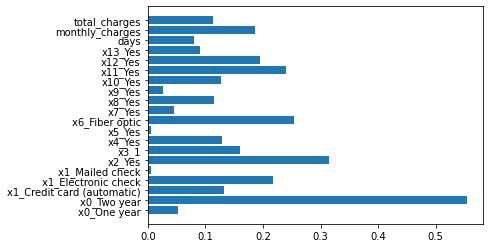

In [103]:
plt.barh(column_names, [abs(x.mean()) for x in feature_importance])
plt.show()

# Вывод

На данном этапе нужной метрики не получилось добится. Из матрицы ошибок создется впечатление что модель работает очень хорошо. Точно такое же впечатление создается из показателей полноты и точности. У меня не получилось применить 'predict_proba'. Из исследования важности показателей мы наблюдаем важность 'type_Two year' и 'device_protection_Yes'. Данное исследование не полное, так как совет был исползовать 'drop="first"' вместо 'drop="if_binary"'.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

<b>На доработку🤔:</b>
    
В конце выполнения каждой работы важно оставлять итоговый вывод, делиться какими-то рассуждениями, умозаключениями.

<div class="alert alert-info">
<h2> Комментарий студента: <a class="tocSkip"> </h2>

<b>👋:</b> Мне кажется, осталось еще много вопросов.
</div> 

<div class="alert alert-success">
<h2> Комментарий ревьюера 2 <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера <a class="tocSkip"> </h2>    
    
  
У меня сложилось отличное впечатление о проекте, тебе удалось справиться с таким выпускным проектом. Молодец! Подготовлены данные для анализа, изучены все параметры. Все красиво визуализировано, построено несколько моделей классификации и оценено их качество. Осмысленная аналитика и дельная модельная работа - многое удалось как надо)
    
Отмечу отдельные положительные моменты проекта🙂:
    
- использован признак время жизни клиента, а последней датой используется не сегодняшняя дата, а дата выгрузки;  
- по ходу проекта переменные названы понятно;
- много красивых визуализаций в проекте и хорошая интерпретация;
- при обучении моделей использована кросс-валидация и поиск гиперпараметров.
   
    
Есть несколько моментов всего, на которые стоит ещё раз взглянуть, я указал их в моих комментариях по ходу проекта. Предлагаю тебе доработать проект по моим комментариям, чтобы довести его до совершенства.

    
Если будут вопросы, обращайся, с удовольствием на них отвечу.  
</div>

<div style="border:solid Chocolate 2px; padding: 40px">


<h2> Итоговый комментарий ревьюера 7 <a class="tocSkip"> </h2>    
    
     
  
Спасибо за исправления! Принимаю твой проект)
    
Если хочешь лучше разобраться в специальности, то предлагаю полезные материалы:   
-  <a href="https://academy.yandex.ru/handbook/ml/">Книга от ШАД</a>
    
- <a href="https://www.youtube.com/playlist?list=PLJ_CMbwA6bT-n1W0mgOlYwccZ-j6gBXqE">Лекции от Andrew Ng</a> 
    
- <a href="https://habr.com/ru/company/ods/blog/322626/">Открытый курс машинного обучения</a>
    
- Не все признаки приносят пользу при моделировании. Инструмент <a href="https://proglib.io/p/feature-selector">FeatureSelector</a> поможет тебе отобрать важные признаки и избавит от ручной обработки.  Также можешь посмотреть статью на <a href="https://www.kaggle.com/code/prashant111/comprehensive-guide-on-feature-selection/notebook">Kaggle</a>.
    
- Избежать утечки данных при кросс-валидации тебе поможет <a href="https://towardsdatascience.com/pipeline-columntransformer-and-featureunion-explained-f5491f815f">конвеерная обработка данных</a>.  
    
- Интерпретировать предсказания моделей поможет  <a href="https://habr.com/ru/post/428213/">SHAP</a>,   <a href="https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137">+ еще ссылка</a>.    
- Интересные способы <a href="https://github.com/DmitrySerg/otus-public/tree/master/OpenLessons/AnomalyDetection">обработки аномалий</a>.        
    
    
С интересом изучал твою работу, код и выводы. Что ещё для дальнейшего улучшения качества/скорости моделирования возможно сделать?
    
Опишу здесь некоторые идеи:
    
1. Качество данных на входе: ещё раз оценить аномалии, пропуски, проверить согласованность временных признаков.
2. Генерация новых полезных признаков (features engineering).
3. Оптимизация подбора гиперпараметров (OptunaSearchCV, RandomizedSearchCV, BayesSearchCV и т.д.)
4. Анализ остатков (разницы между прогнозом и истинным значением таргета): выявить, в каких случаях чаще всего ошибается, а в каких выдает наиболее точный результат... 
5. Отбор признаков и оценка их важности.    
А главное, мы достигли цели нашего проекта: пройдены основные этапы построения модели классификации для прогнозирования оттока клиентов с учетом ее качества.
    
Рад был тебе помочь)

Удачи!
  
</div>

- Выгрузка данных
- Разделение на тренировочный и тестировочный массив
- Исследование тренировочного массива
- Исследование классических моделей
- Исследование градиентного спуска
- Исследование нейронных моделей
- Тестирование лучшей модели
- Вывод

In [104]:
query_df = \
'''
SELECT 
    CASE
        WHEN c."EndDate" IS NOT NULL THEN TRUE
        ELSE FALSE
    END AS terminated,
    COALESCE(c."EndDate", '2020-02-1') - c."BeginDate" AS "ContractLifeDays",
    c."Type", c."PaperlessBilling", c."PaymentMethod", c."MonthlyCharges", c."TotalCharges",
    p."gender", p."SeniorCitizen", p."Partner", p."Dependents",
    i."c2", i."c3", i."c4", i."c5", 
    i."c6", i."c7", i."c8",
    phone."c2"
FROM telecom.contract AS c
    LEFT JOIN telecom.personal AS p
    ON c."customerID" = p."customerID"
    LEFT JOIN telecom.internet AS i
    ON c."customerID" = i."c1"
    LEFT JOIN telecom.phone
    ON c."customerID" = phone."c1"
'''
columns_df = ['terminated', 
              'days', 
              'type', 'paperless_billing', 'payment_method', 'monthly_charges', 'total_charges',
              'gender', 'senior_citizen', 'partner', 'dependents',
              'internet_service', 'online_security', 'online_backup', 'device_protection',
              'tech_support', 'streaming_tv', 'streaming_movies',
              'multiple_lines'
            ]
df = postgresql_to_dataframe(conn, query_df, columns_df)

In [739]:
train, test = train_test_split(df, test_size=0.25, random_state=RANDOM_STATE)

In [740]:
train.head(3)

,terminated,days,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
2703,False,369,Two year,No,Bank transfer (automatic),39.6,2424.5,Male,0,No,No,DSL,Yes,Yes,Yes,No,No,No,None
21,True,346,Month-to-month,Yes,Bank transfer (automatic),97.85,1105.4,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
606,True,110,Month-to-month,No,Mailed check,70.9,70.9,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


### Data Preprocessing + Analysis

In [741]:
list_expected_columns = df.columns

In [742]:
dict_expected_format =\
{
  'terminated': 'bool',
  'days': 'int64',
  'type': 'object',
  'paperless_billing': 'object',
  'payment_method': 'object',
  'monthly_charges': 'object',
  'total_charges': 'object',
  'gender': 'object',
  'senior_citizen': 'int64',
  'partner': 'object',
  'dependents': 'object',
  'internet_service': 'object',
  'online_security': 'object',
  'online_backup': 'object',
  'device_protection': 'object',
  'tech_support': 'object',
  'streaming_tv': 'object',
  'streaming_movies': 'object',
  'multiple_lines': 'object'
}

In [743]:
def preprocessing_check_columns(df, list_expected_columns):
    if sorted(df.columns) != sorted(list_expected_columns):
        print('Input data doesn\'t match the expected columns.')
        os.kill(os.getpid(), signal.SIGINT)

In [744]:
def preprocessing_check_format(df, dict_expected_format):
    for col in df.columns:
        if df[col].dtype != dict_expected_format[col]:
            print('Input data doesn\'t match the expected format.')
            os.kill(os.getpid(), signal.SIGINT)

In [745]:
preprocessing_check_columns(train, list_expected_columns)

In [746]:
preprocessing_check_format(train, dict_expected_format)

In [747]:
def preprocessing(df, inspect=False):
    df = df.copy()
    
    df.terminated = df.terminated.astype('int')
    print('--------------------------------------------------') if inspect else None
    print('not terminated {}, terminated {}'.format(*pd.value_counts(df.terminated))) if inspect else None
    
    print('--------------------------------------------------') if inspect else None
    if inspect:
        df.days.hist(grid=False, bins=20)
        plt.title('days distribution')
        plt.show()
        print('days max {}'.format(max(df.days)))
    df.days = df.days.clip(lower=1, upper=571)
    df.days = df.days.fillna(300)
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.type)) if inspect else None
    df.type = df.type[df.type.isin({'Month-to-month', 'Two year', 'One year'})]
    df.type = df.type.fillna('Month-to-month')
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.paperless_billing)) if inspect else None
    df.paperless_billing = df.paperless_billing[df.paperless_billing.isin({'Yes', 'No'})]
    df.paperless_billing = df.paperless_billing.fillna('No')
    df.paperless_billing = df.paperless_billing.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.payment_method)) if inspect else None
    df.payment_method = df.payment_method[df.payment_method.isin(
        {'Electronic check','Mailed check','Bank transfer (automatic)','Credit card (automatic)'})]
    df.payment_method = df.payment_method.fillna('Electronic check')
    
    print('--------------------------------------------------') if inspect else None
    df.monthly_charges = pd.to_numeric(df.monthly_charges, errors='coerce')
    if inspect:
        df.monthly_charges.hist(grid=False, bins=20)
        plt.title('monthly charges distribution')
        plt.show()
        print('monthly charges max {}'.format(max(df.monthly_charges)))
    df.monthly_charges = df.monthly_charges.fillna(20)
    df.monthly_charges = df.monthly_charges.clip(upper=118.75)
    
    print('--------------------------------------------------') if inspect else None
    df.total_charges = pd.to_numeric(df.total_charges, errors='coerce')
    if inspect:
        df.total_charges.hist(grid=False, bins=20)
        plt.title('total charges distribution')
        plt.show()
        print('total charges max {}'.format(max(df.total_charges)))
    df.total_charges = df.total_charges.fillna(20)
    df.total_charges = df.total_charges.clip(upper=8684.8)
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.gender)) if inspect else None
    df.gender = df.gender[df.gender.isin({'Male', 'Female'})]
    df.gender = df.gender.fillna('Female')
    df.gender = df.gender.map({'Female':0, 'Male':1})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.senior_citizen)) if inspect else None
    df.senior_citizen = df.senior_citizen.clip(upper=1)
    df.senior_citizen = df.senior_citizen.fillna(0)
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.partner)) if inspect else None
    df.partner = df.partner[df.partner.isin({'Yes', 'No'})]
    df.partner = df.partner.fillna('No')
    df.partner = df.partner.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.dependents)) if inspect else None
    df.dependents = df.dependents[df.dependents.isin({'Yes', 'No'})]
    df.dependents = df.dependents.fillna('No')
    df.dependents = df.dependents.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.internet_service)) if inspect else None
    df.internet_service = df.internet_service[df.internet_service.isin({'Fiber optic', 'DSL'})]
    df.internet_service = df.internet_service.fillna('Fiber optic')
    df.internet_service = df.internet_service.map({'Fiber optic': 1, 'DSL': 0})

    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.online_security)) if inspect else None
    df.online_security = df.online_security[df.online_security.isin({'Yes', 'No'})]
    df.online_security = df.online_security.fillna('No')
    df.online_security = df.online_security.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.online_backup)) if inspect else None
    df.online_backup = df.online_backup[df.online_backup.isin({'Yes', 'No'})]
    df.online_backup = df.online_backup.fillna('No')
    df.online_backup = df.online_backup.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.device_protection)) if inspect else None
    df.device_protection = df.device_protection[df.device_protection.isin({'Yes', 'No'})]
    df.device_protection = df.device_protection.fillna('No')
    df.device_protection = df.device_protection.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.tech_support)) if inspect else None
    df.tech_support = df.tech_support[df.tech_support.isin({'Yes', 'No'})]
    df.tech_support = df.tech_support.fillna('No')
    df.tech_support = df.tech_support.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.streaming_tv)) if inspect else None
    df.streaming_tv = df.streaming_tv[df.streaming_tv.isin({'Yes', 'No'})]
    df.streaming_tv = df.streaming_tv.fillna('No')
    df.streaming_tv = df.streaming_tv.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.streaming_movies)) if inspect else None
    df.streaming_movies = df.streaming_movies[df.streaming_movies.isin({'Yes', 'No'})]
    df.streaming_movies = df.streaming_movies.fillna('No')
    df.streaming_movies = df.streaming_movies.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print(pd.value_counts(df.multiple_lines)) if inspect else None
    df.multiple_lines = df.multiple_lines[df.multiple_lines.isin({'Yes', 'No'})]
    df.multiple_lines = df.multiple_lines.fillna('No')
    df.multiple_lines = df.multiple_lines.map({'Yes': 1, 'No': 0})
    
    print('--------------------------------------------------') if inspect else None
    print('new feature charges_ratio') if inspect else None
    df['charges_ratio'] = df.total_charges / df.days
    df.charges_ratio = df.charges_ratio.clip(upper=100)
    if inspect:
        df.charges_ratio.hist(grid=False, bins=20)
        plt.title('charges_ratio distribution')
        plt.show()
        print('charges_ratio max {}'.format(max(df.charges_ratio)))
    
    print('--------------------------------------------------') if inspect else None
    print('new feature months payed') if inspect else None
    df['months_payed'] = df.total_charges / df.monthly_charges
    if inspect:
        df.months_payed.hist(grid=False, bins=20)
        plt.title('months_payed distribution')
        plt.show()
        print('months_payed max {}'.format(max(df.months_payed)))
    
    print('--------------------------------------------------') if inspect else None
    
    return df

--------------------------------------------------
not terminated 3916, terminated 1366
--------------------------------------------------


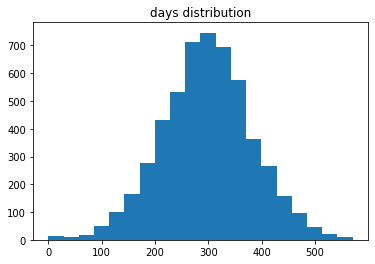

days max 571
--------------------------------------------------
Month-to-month    2853
Two year          1305
One year          1124
Name: type, dtype: int64
--------------------------------------------------
Yes    3093
No     2189
Name: paperless_billing, dtype: int64
--------------------------------------------------
Electronic check             1730
Mailed check                 1237
Bank transfer (automatic)    1181
Credit card (automatic)      1134
Name: payment_method, dtype: int64
--------------------------------------------------


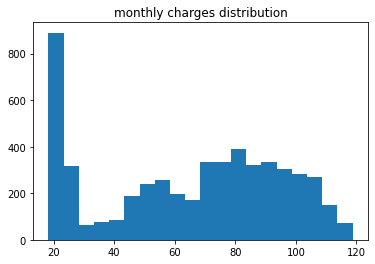

monthly charges max 118.75
--------------------------------------------------


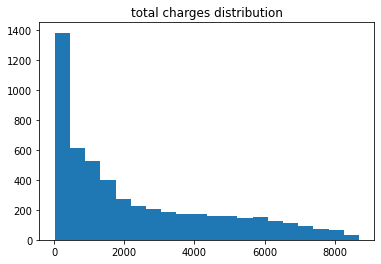

total charges max 8684.8
--------------------------------------------------
Female    2650
Male      2632
Name: gender, dtype: int64
--------------------------------------------------
0    4453
1     829
Name: senior_citizen, dtype: int64
--------------------------------------------------
No     2690
Yes    2592
Name: partner, dtype: int64
--------------------------------------------------
No     3650
Yes    1632
Name: dependents, dtype: int64
--------------------------------------------------
Fiber optic    2272
DSL            1864
Name: internet_service, dtype: int64
--------------------------------------------------
No     2573
Yes    1563
Name: online_security, dtype: int64
--------------------------------------------------
No     2287
Yes    1849
Name: online_backup, dtype: int64
--------------------------------------------------
No     2321
Yes    1815
Name: device_protection, dtype: int64
--------------------------------------------------
No     2587
Yes    1549
Name: tech_suppo

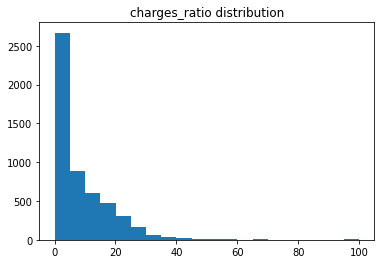

charges_ratio max 100.0
--------------------------------------------------
new feature months payed


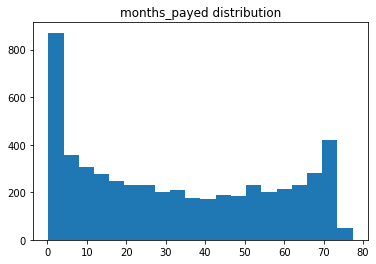

months_payed max 77.37777777777778
--------------------------------------------------


In [748]:
train = preprocessing(train, True)

In [749]:
numerical_cols = ['days', 'charges_ratio', 'monthly_charges'
                  , 'total_charges', 'months_payed']

In [750]:
def inspect_numerical_correlation(df, cols, target):
    for col in cols:
        df[df[target] == 1][col].plot.hist(bins=20, alpha=0.6, color='red')
        df[df[target] == 0][col].plot.hist(bins=20, alpha=0.3, color='blue')
        plt.title(col)
        plt.show()
        print('corr {}'.format(df[target].corr(df[col])))

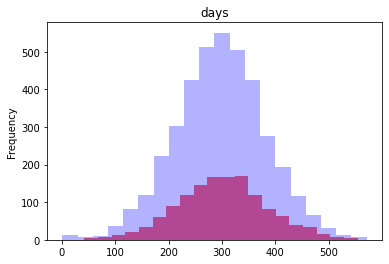

corr 0.019368370541344503


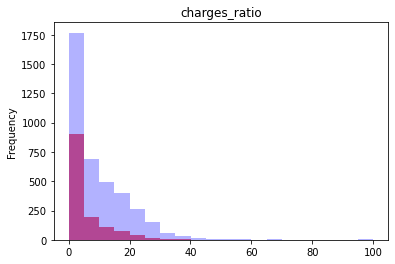

corr -0.17078590940525593


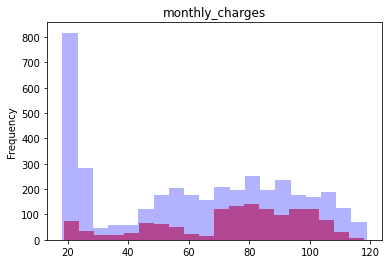

corr 0.1877036450390478


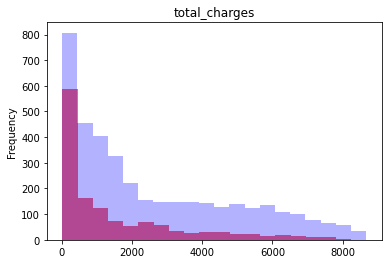

corr -0.20120724391514147


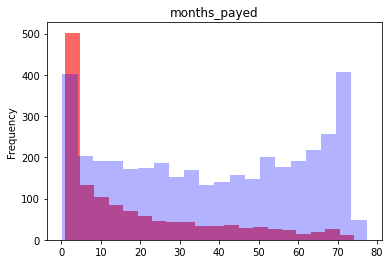

corr -0.3546589748296164


In [751]:
inspect_numerical_correlation(train, numerical_cols, 'terminated')

Корреляция

In [752]:
def inspect_categorical_correlation(df, cols, target):
    names = []
    chi2_list = []
    p_value_list = []
    cramers_v_list = []

    for col in cols:
        if col == target:
            continue
        contingency_table = pd.crosstab(df[col], df[target])
        chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()
        phi_corr = np.sqrt(chi2 / (n * (min(contingency_table.shape)-1)))
        cramers_v = phi_corr
        names.append(col)
        chi2_list.append(chi2)
        p_value_list.append(p_value)
        cramers_v_list.append(cramers_v)
        
    chi2_list, chi2_names = zip(*sorted(zip(chi2_list, list(names))))
    p_value_list, p_value_names = zip(*sorted(zip(p_value_list, list(names))))
    cramers_v_list, cramers_v_names = zip(*sorted(zip(cramers_v_list, list(names))))

    #     print('{:40} Chi-square-{:5.1f} P-value-{:.2f} Cramer\'s V-{:.2f}'\
    #           .format(str(col), chi2, p_value, cramers_v))
    x_axis = range(1, len(names) + 1)
    plt.barh(chi2_names, chi2_list)
    plt.title('chi2')
    plt.show()
    plt.barh(p_value_names, p_value_list)
    plt.title('p_value')
    plt.show()
    plt.barh(cramers_v_names, cramers_v_list)
    plt.title('cramers_v')
    plt.show()

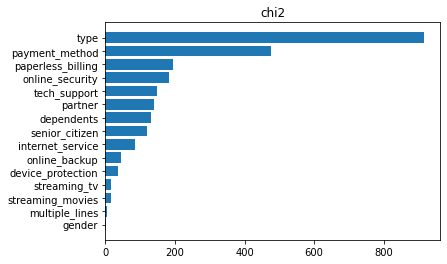

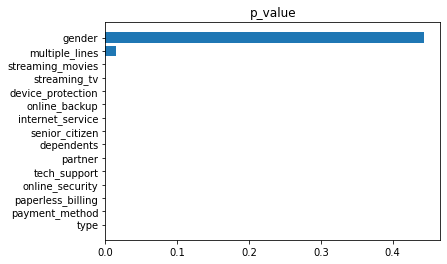

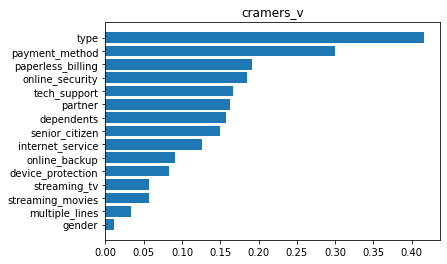

In [753]:
inspect_categorical_correlation(train, list(set(train.columns) - set(numerical_cols)), 'terminated')

- Здесь видно что 'gender', 'multiple_lines', 'streaming_tv', 'streaming_moves' это слабые показатели.
- А нам известно что чтобы улучшить ROC_AUC нужно выбирать только силные показатели

In [754]:
def preprocessing_remove_weak_columns(df):
    weak_columns = ['gender', 'multiple_lines','days', 'months_payed']
#                     , 'streaming_movies', 'streaming_tv', 'device_protection'
#                     , 'online_backup', 'internet_service'
#                     , 'senior_citizen', 'dependents', 'partner', 'tech_support'
#                     , 'online_security', 'paperless_billing']
    df = df.copy()
    df = df.drop(columns=weak_columns)
    return df

In [755]:
numerical_cols.remove('days')
numerical_cols.remove('months_payed')
# numerical_cols = ['months_payed', 'charges_ratio']

In [756]:
train = preprocessing_remove_weak_columns(train)

In [757]:
sca = StandardScaler()
enc = OneHotEncoder(drop='first')

In [758]:
X_train_cat = enc.fit_transform(train.drop(columns=[*(numerical_cols + ['terminated'])])).toarray()
X_train_num = sca.fit_transform(train[numerical_cols])
X_train_num = train[numerical_cols]
X_train = np.hstack((X_train_cat, X_train_num))
y_train = df_train.terminated

### train different models

In [759]:
param_grid = {'n_estimators': [200], 'min_samples_leaf': [12, 16]}
rfc = RandomForestClassifier(criterion='entropy')
grid_rfc = GridSearchCV(rfc, param_grid, scoring='roc_auc')
grid_rfc.fit(X_train, y_train)
print(grid_rfc.best_score_)
print(grid_rfc.best_params_)

0.8511515141548479
{'min_samples_leaf': 12, 'n_estimators': 200}


In [760]:
param_grid = {'n_estimators': [24], 'max_depth': [2]}
model_xgb = xgb.XGBClassifier(use_label_encoder=False, eval_metric='aucpr')
grid_xgb = GridSearchCV(model_xgb, param_grid, scoring='roc_auc')
grid_xgb.fit(X_train, y_train)
print(grid_xgb.best_score_)
print(grid_xgb.best_params_)

0.8497661643438794
{'max_depth': 2, 'n_estimators': 24}


In [761]:
param_grid = {'n_estimators': [32], 'max_depth': [2]}
model_cat = CatBoostClassifier(loss_function='Logloss', eval_metric='AUC', verbose=False)
grid_cat = GridSearchCV(model_cat, param_grid, scoring='roc_auc')
grid_cat.fit(X_train, y_train)
print(grid_cat.best_score_)
print(grid_cat.best_params_)

0.8490487648967893
{'max_depth': 2, 'n_estimators': 32}


In [762]:
callback = EarlyStopping(monitor='accuracy', patience=2)
optimizer = Adam(learning_rate=0.005)

model_ff = Sequential()
model_ff.add(Dense(32, activation='relu', input_dim=X_train.shape[1]))
model_ff.add(Dense(16, activation='tanh'))
model_ff.add(Dense(1, activation='sigmoid'))

model_ff.compile(loss='binary_crossentropy', 
                 optimizer=optimizer, metrics=['accuracy'])
model_ff.fit(X_train, y_train, epochs=40, verbose=1, callbacks=[callback])

Epoch 1/40
166/166 [==============================] - 1s 4ms/step - loss: 0.5623 - accuracy: 0.7404
Epoch 2/40
166/166 [==============================] - 1s 3ms/step - loss: 0.5306 - accuracy: 0.7482
Epoch 3/40
166/166 [==============================] - 1s 3ms/step - loss: 0.5362 - accuracy: 0.7607
Epoch 4/40
166/166 [==============================] - 1s 4ms/step - loss: 0.5373 - accuracy: 0.7685
Epoch 5/40
166/166 [==============================] - 1s 4ms/step - loss: 0.5291 - accuracy: 0.7660
Epoch 6/40
166/166 [==============================] - 1s 4ms/step - loss: 0.5344 - accuracy: 0.7569


### preprocess test data

In [763]:
preprocessing_check_columns(test, list_expected_columns)

In [764]:
preprocessing_check_format(test, dict_expected_format)

In [765]:
test = preprocessing(test)

In [766]:
test = preprocessing_remove_weak_columns(test)

In [767]:
X_test_cat = enc.transform(test.drop(columns=[*(numerical_cols + ['terminated'])])).toarray()
X_test_num = sca.transform(test[numerical_cols])
X_test_num = test[numerical_cols]
X_test = np.hstack((X_test_cat, X_test_num))
y_test = df_test.terminated

### testing

In [773]:
z_test = grid_cat.best_estimator_.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, z_test)
print('CatBoost ROC AUC score:', roc_auc)

CatBoost ROC AUC score: 0.8292889720500527


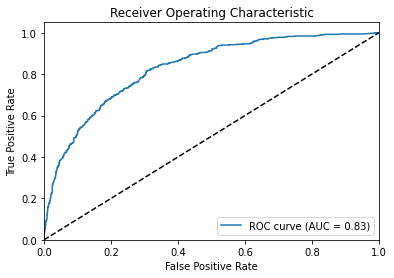

In [769]:
fpr, tpr, thresholds = roc_curve(y_test, z_test)

roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')  # Plotting the random guessing curve
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# z_test = grid_rfc.best_estimator_.predict_proba(X_test)[:,1]
# roc_auc = roc_auc_score(y_test, z_test)
# print('RandomForestClassifier score:', roc_auc)

In [ ]:
# fpr, tpr, thresholds = roc_curve(y_test, z_test)

# roc_auc = auc(fpr, tpr)

# plt.figure()
# plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % roc_auc)
# plt.plot([0, 1], [0, 1], 'k--')  # Plotting the random guessing curve
# plt.xlim([0.0, 1.0])
# plt.ylim([0.0, 1.05])
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic')
# plt.legend(loc="lower right")
# plt.show()